In [1]:
import os
import seaborn as sns
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BlackFriday.csv')
print(data.shape)
data.head()

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Correlation analysis

### 1. Purchase and other numeric features

Gender is categorical, but we can convert the column into binary form

In [3]:
data1 = data
data1['GenderInt'] = (data1['Gender'] == 'F').astype(int)
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderInt
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,0


In [4]:
numeric_features = data1.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
GenderInt               int32
dtype: object

In [5]:
#Purchase 와 나머지 feature 간의 correlation
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
GenderInt            -0.060086
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 



Occupation has the biggest correlation value with 'purchase', but still the correlation value is low. There does not seem to be any predictor that would have a high impact on Purchase. 

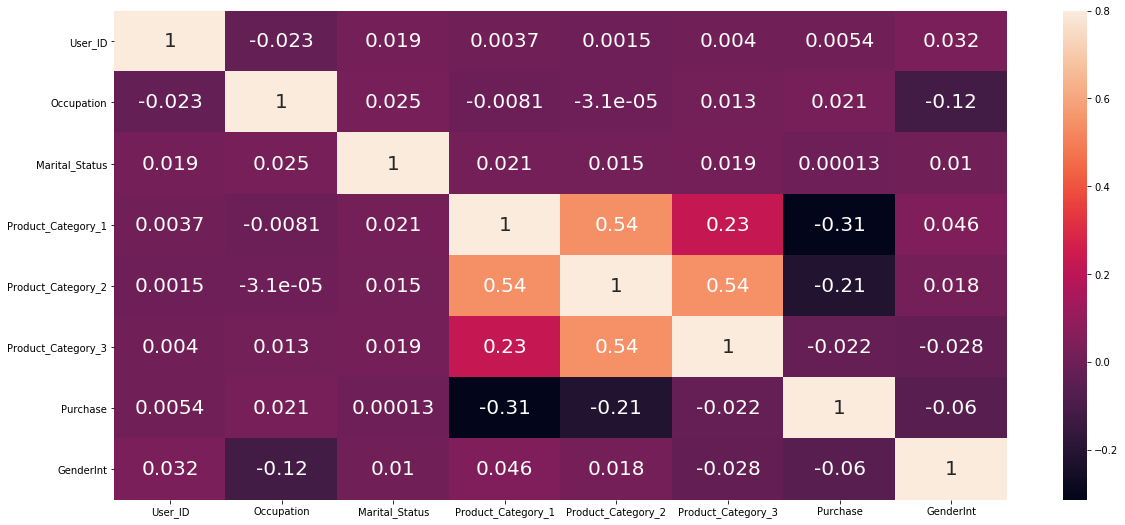

In [6]:
data2 = data1
corrmat = data2.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8,annot_kws={'size': 20}, annot=True) 

Correlation value between Product_catgory 1, 2 and 3 is high. So, we'll just deal with the Product_category 1 in correlation analysis.

In [7]:
del_columns = ['Product_Category_2', 'Product_Category_3']
data2.drop(del_columns, inplace=True, axis=1)
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,GenderInt
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,0


#### Convert data into Numeric values

How about converting age-group into numeric values?

In [8]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data2 = data1
data2["AgeInt"] = data1["Age"].apply(lambda line: age_dict[line])


In [9]:
data2[["User_ID", "Age", "AgeInt"]].head()

,User_ID,Age,AgeInt
0,1000001,0-17,0
1,1000001,0-17,0
2,1000001,0-17,0
3,1000001,0-17,0
4,1000002,55+,6


Column "AgeInt" has numerical values.

In [10]:
#Purchase 와 나머지 feature 간의 correlation - Age 에 대해서 추가
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase              1.000000
Occupation            0.021104
AgeInt                0.017717
User_ID               0.005389
Marital_Status        0.000129
GenderInt            -0.060086
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 



In [11]:
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n')

Product_Category_1    1.000000
AgeInt                0.061951
GenderInt             0.045661
Marital_Status        0.020546
User_ID               0.003687
Occupation           -0.008114
Purchase             -0.314125
Name: Product_Category_1, dtype: float64 



Convert 'City_Category' into numeric values

In [12]:
data2.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
GenderInt                         2
AgeInt                            7
dtype: int64

In [13]:
#City_Category 에는 A, B, C 값이 있음.
# Giving City_Category Numerical values
city_dict = {'A':0, 'B':1, 'C':2 }
data2["City_Category"] = data2["City_Category"].apply(lambda line: city_dict[line])
data2[["User_ID", "City_Category"]].head()

,User_ID,City_Category
0,1000001,0
1,1000001,0
2,1000001,0
3,1000001,0
4,1000002,2


Convert 'Stay_In_Current_City_Years' to numerical values

In [14]:
#Number of times each value appears in the column
frequency = data2['Stay_In_Current_City_Years'].value_counts()
print("Frequency distribution for Stay_In_Current_City_Years\n")
print(frequency)

Frequency distribution for Stay_In_Current_City_Years

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64


In [15]:
# Giving City_Category Numerical values
# Convert 4+ into 4
city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4 }
data2["Stay_In_Current_City_Years"] = data2["Stay_In_Current_City_Years"].apply(lambda line: city_dict[line])
data2[["User_ID", "Stay_In_Current_City_Years"]].head()

,User_ID,Stay_In_Current_City_Years
0,1000001,2
1,1000001,2
2,1000001,2
3,1000001,2
4,1000002,4


In [55]:
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,GenderInt,AgeInt
0,1000001,P00069042,F,0-17,10,0,2,0,3,8370,1,0
1,1000001,P00248942,F,0-17,10,0,2,0,1,15200,1,0
2,1000001,P00087842,F,0-17,10,0,2,0,12,1422,1,0
3,1000001,P00085442,F,0-17,10,0,2,0,12,1057,1,0
4,1000002,P00285442,M,55+,16,2,4,0,8,7969,0,6


Numerical value 로 convert 한 data2 에 대하여, 'purchase' 와 다른 feature 간의 correlation 을 구한다.

In [16]:
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase                      1.000000
City_Category                 0.068507
Occupation                    0.021104
AgeInt                        0.017717
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
GenderInt                    -0.060086
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 



correlation matrix of data2

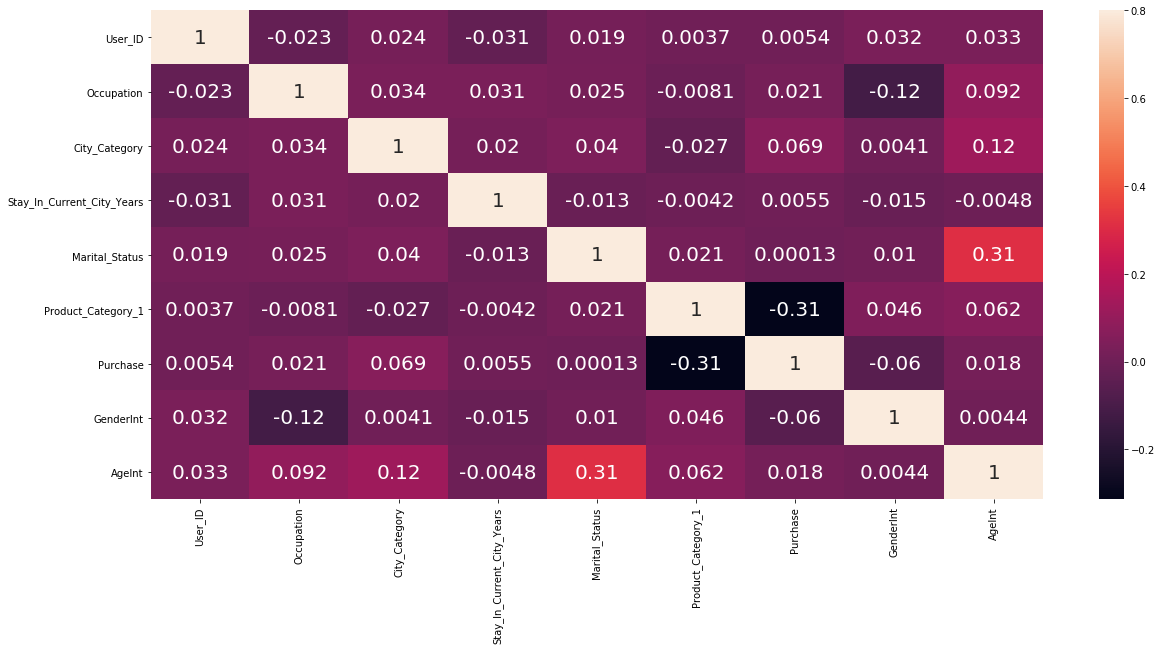

In [17]:
corrmat = data2.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8,annot_kws={'size': 20}, annot=True) 

Above results are the correlations between purchase and other features. 

#### Get the users' data using the number of purchases and the sum of purchase

In [18]:
# user 기준으로 정렬
data2_sort = data2.sort_values(["User_ID"], ascending=[True])
# 정렬한 data 의 index 를 재설정
data2_sort = data2_sort.reset_index(drop = True)
data2_sort.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,GenderInt,AgeInt
0,1000001,P00069042,F,0-17,10,0,2,0,3,8370,1,0
1,1000001,P00255842,F,0-17,10,0,2,0,16,16446,1,0
2,1000001,P0097142,F,0-17,10,0,2,0,12,1715,1,0
3,1000001,P00289942,F,0-17,10,0,2,0,3,10900,1,0
4,1000001,P00210342,F,0-17,10,0,2,0,3,11039,1,0


정렬한 data2_sort 에서 user 별로 purchase 의 합계와 구매 상품 수량을 구한다

In [19]:
# create user_id array. only unique value. remove duplicate ones
user_ids = list(set(data2_sort["User_ID"]))
user_data = data2_sort

# sum_purchase 와 purchase_count 를 저장할 dataframe user_data

del_columns = ['Product_ID', 'Product_Category_1']
user_data.drop(del_columns, axis=1, inplace = True)

#user_data 에 대해 user_id 기준 행 중복 제거. 첫번째 행만 남기고 지움.
user_data = user_data.drop_duplicates(["User_ID"], keep="first")
user_data = user_data.reset_index(drop = True)

# Sum_purchase 로 명칭 변경
user_data= user_data.rename(columns = {'Purchase': 'Sum_purchase'})

user_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Sum_purchase,GenderInt,AgeInt
0,1000001,F,0-17,10,0,2,0,8370,1,0
1,1000002,M,55+,16,2,4,0,5260,0,6
2,1000003,M,26-35,15,0,3,0,3938,0,2
3,1000004,M,46-50,7,1,2,1,3849,0,4
4,1000005,M,26-35,20,0,1,1,15466,0,2


In [20]:
user_num = len(user_ids)
#user_data 에 각 user 별로 소비 금액 계산
for idx in range(user_num):
    filters = data2_sort[data2_sort['User_ID'].isin([user_ids[idx]])]
    sum_purchase = 0
    count = len(filters.index)
    for index, row in filters.iterrows() :
        sum_purchase += row['Purchase']
        
    user_data.at[user_data.index[idx], 'Count_purchase'] = count
    user_data.at[user_data.index[idx], 'Sum_purchase'] = sum_purchase

user_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Sum_purchase,GenderInt,AgeInt,Count_purchase
0,1000001,F,0-17,10,0,2,0,333481,1,0,34.0
1,1000002,M,55+,16,2,4,0,810353,0,6,76.0
2,1000003,M,26-35,15,0,3,0,341635,0,2,29.0
3,1000004,M,46-50,7,1,2,1,205987,0,4,13.0
4,1000005,M,26-35,20,0,1,1,821001,0,2,106.0


In [21]:
user_data.shape

(5891, 11)

user_data 에 Sum_purchase 와 Count_purchase 저장. correlation 계산할 것임.

user_data 의 user 와 관련된 feature 에 대해 numerical value 로 바꿈. 

##### user_data 내에서 sum_purchase 와 나머지 feature 사이의 correlation

In [22]:
numeric_features = user_data.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Sum_purchase'].sort_values(ascending=False)[:10],'\n')

Sum_purchase                  1.000000
Count_purchase                0.978977
Stay_In_Current_City_Years    0.003296
Occupation                    0.000419
User_ID                      -0.014669
Marital_Status               -0.020592
AgeInt                       -0.068740
GenderInt                    -0.102781
City_Category                -0.343058
Name: Sum_purchase, dtype: float64 



##### user_data 내에서 Count_purchase 와 나머지 feature 사이의 correlation 분석

In [23]:
numeric_features = user_data.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Count_purchase'].sort_values(ascending=False)[:10],'\n')

Count_purchase                1.000000
Sum_purchase                  0.978977
Stay_In_Current_City_Years    0.000579
Occupation                   -0.009617
User_ID                      -0.016279
Marital_Status               -0.019490
GenderInt                    -0.070573
AgeInt                       -0.072212
City_Category                -0.355030
Name: Count_purchase, dtype: float64 



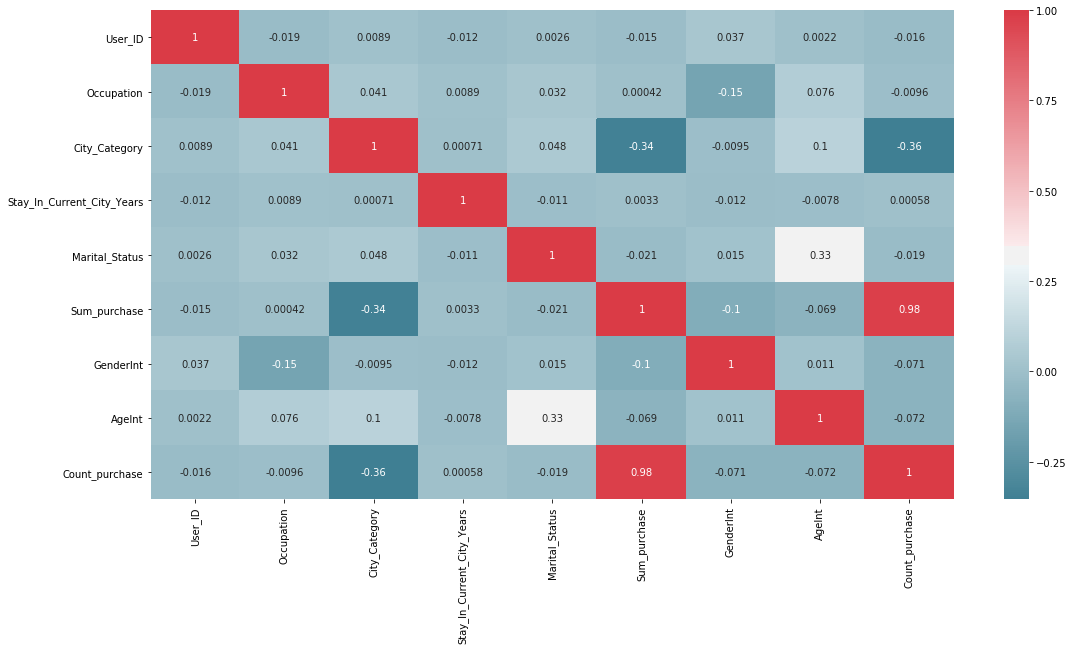

In [24]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = user_data.corr(method = 'pearson')
sns.heatmap(corr, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)


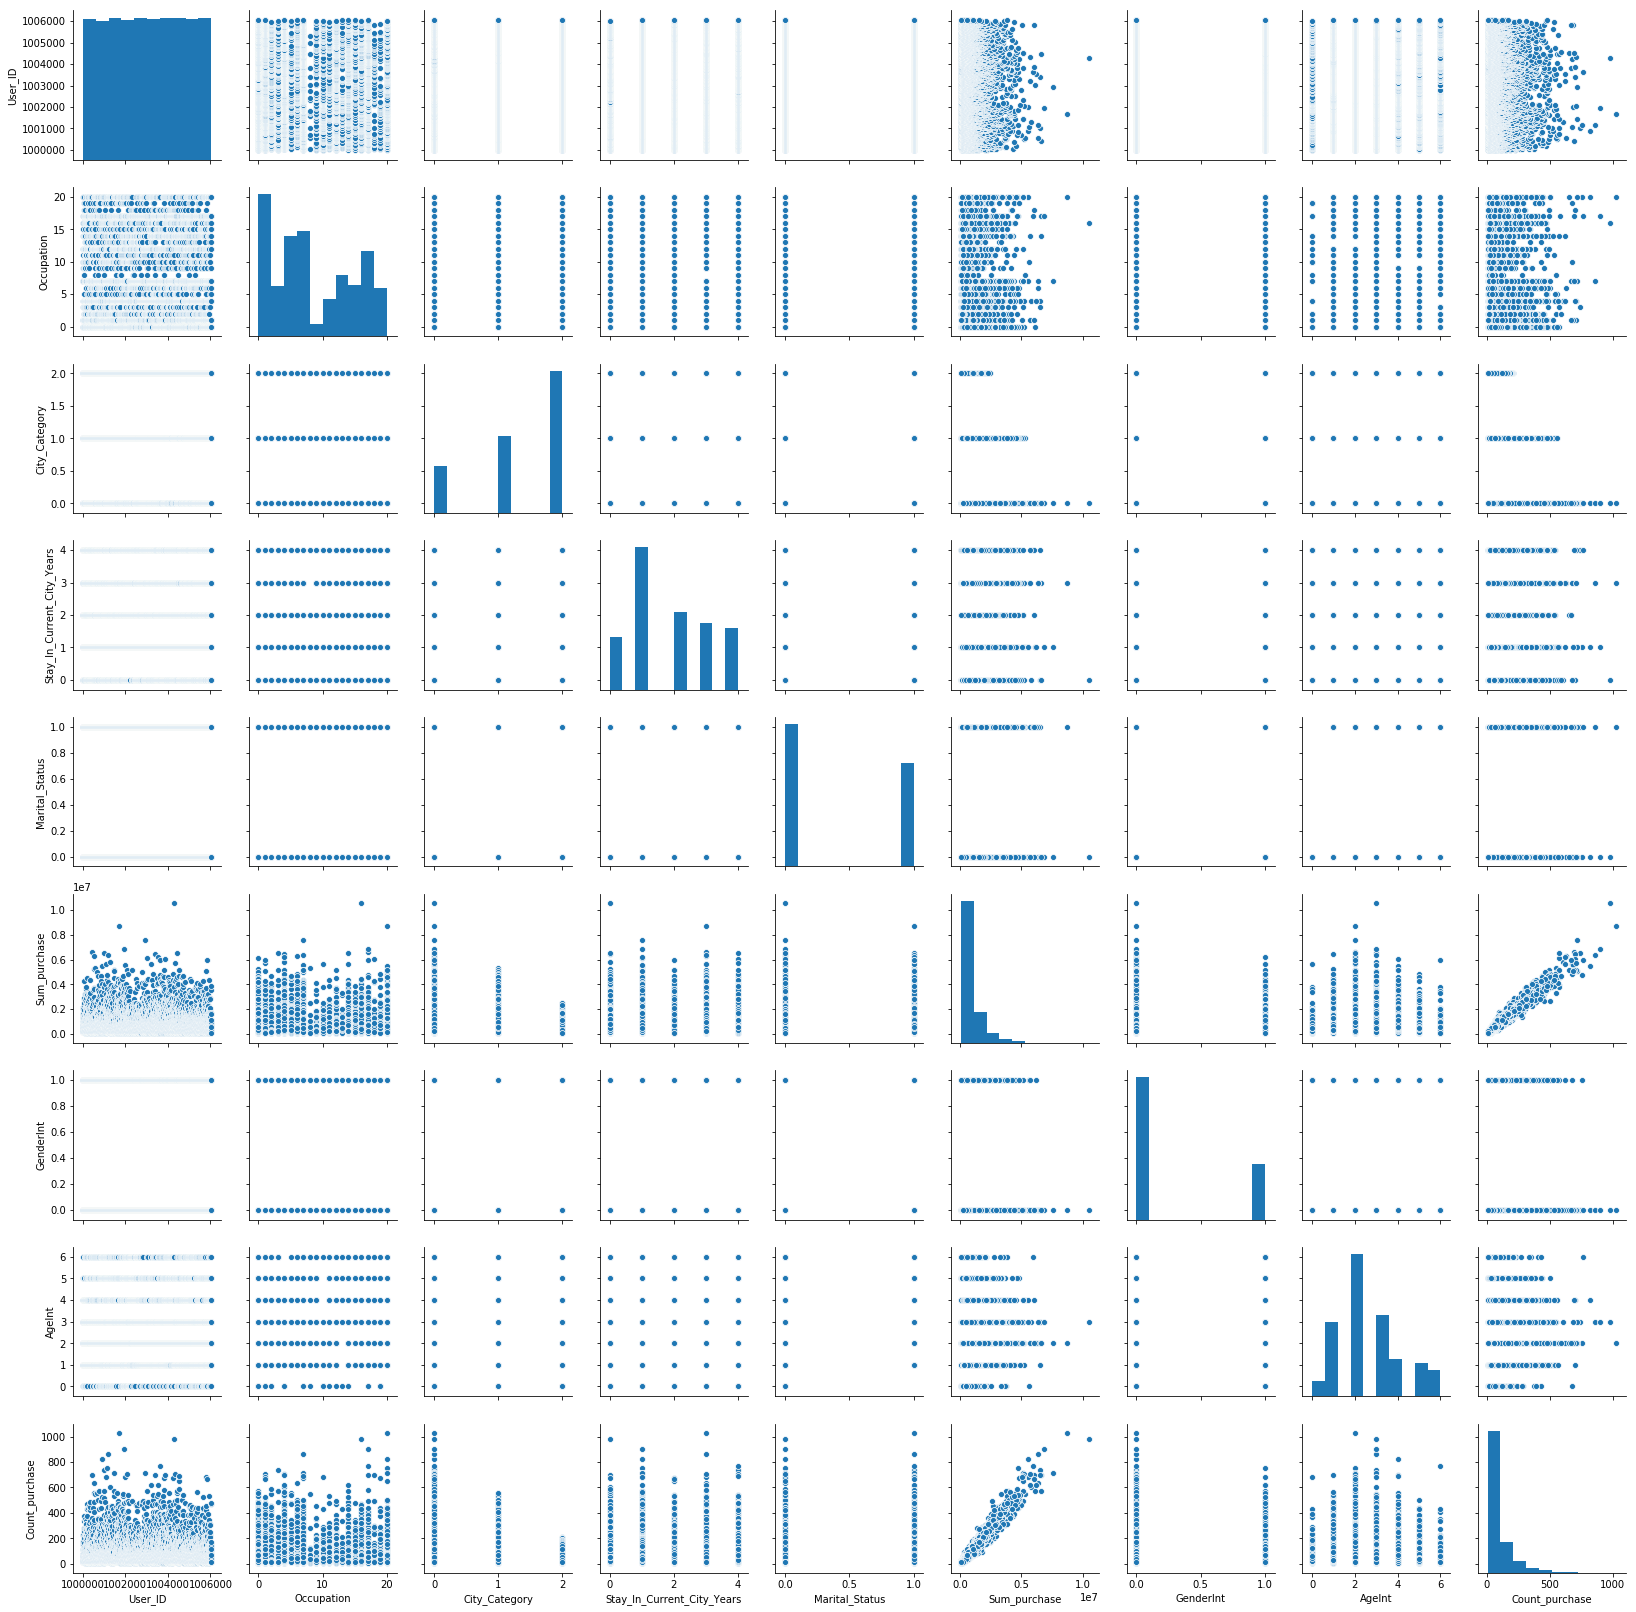

In [25]:
sns.pairplot(user_data)

#### Spearman correlation analysis between purchase and other values using the user_data

In [26]:
#calculate the spearman's correlation between two variables

#ageint, stay_in_current_city_years, AgeInt, Count_Purchase, Sum_purchase
   
column = {"Stay_In_Current_City_Years", "AgeInt", "Count_purchase", "Sum_purchase"} 

spear_data = user_data[["Stay_In_Current_City_Years", "AgeInt", "Count_purchase", "Sum_purchase"]]
corr = spear_data.corr(method = 'spearman')
print (corr['Sum_purchase'].sort_values(ascending=False)[:10],'\n')


Sum_purchase                  1.000000
Count_purchase                0.980553
Stay_In_Current_City_Years    0.007762
AgeInt                       -0.063903
Name: Sum_purchase, dtype: float64 



Spearman correlation heatmap (일부 feature 만)

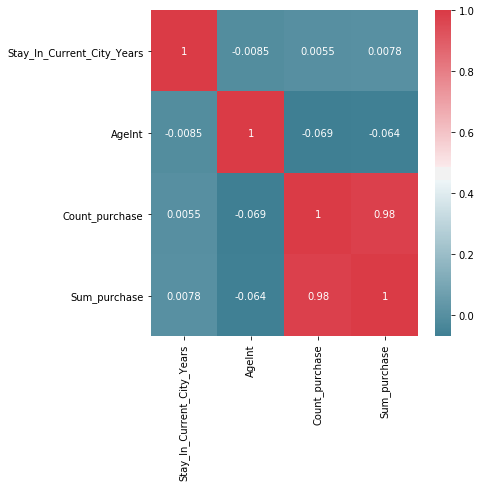

In [27]:
f, ax = plt.subplots(figsize=(6, 6))
corrmat = spear_data.corr(method = 'spearman')
sns.heatmap(corr, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

#### Significance of correlation between purchase and other features

#####         Even small correlations become significant with large-enough sample sizes

- pearson correlation significance between PURCHASE AND OTHER FEATURES

In [34]:
#instead of Numpy, can we use here Numpy and Scipy both library 
#to get the addition p value or in the existing  script can we add this function
#to obtain the p Value as a raster

from scipy.stats import pearsonr, spearmanr

column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", "Purchase", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(data2["Purchase"], data2[col])
    print("<"+ col + ">")
    print("Pearson Correlation Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Pearson Correlation Coefficient and p-value between Purchase and other features

<Product_Category_1>
Pearson Correlation Coefficient: -0.314
p-value: 0.000
-> correlated (reject H0)

<City_Category>
Pearson Correlation Coefficient: 0.069
p-value: 0.000
-> correlated (reject H0)

<GenderInt>
Pearson Correlation Coefficient: -0.060
p-value: 0.000
-> correlated (reject H0)

<Marital_Status>
Pearson Correlation Coefficient: 0.000
p-value: 0.925
-> uncorrelated (fail to reject H0)

<Stay_In_Current_City_Years>
Pearson Correlation Coefficient: 0.005
p-value: 0.000
-> correlated (reject H0)

<Purchase>
Pearson Correlation Coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)

<Occupation>
Pearson Correlation Coefficient: 0.021
p-value: 0.000
-> correlated (reject H0)

<AgeInt>
Pearson Correlation Coefficient: 0.018
p-value: 0.000
-> correlated (reject H0)



- pearson correlation significance between SUM_PURCHASE AND OTHER FEATURES

In [35]:
column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Sum_purchase", "Count_purchase", "Marital_Status", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Sum_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(user_data["Sum_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Pearson Correlation Coefficient and p-value between Sum_purchase and other features

<Count_purchase>
Coefficient: 0.979
p-value: 0.000
-> correlated (reject H0)

<City_Category>
Coefficient: -0.343
p-value: 0.000
-> correlated (reject H0)

<GenderInt>
Coefficient: -0.103
p-value: 0.000
-> correlated (reject H0)

<Stay_In_Current_City_Years>
Coefficient: 0.003
p-value: 0.800
-> uncorrelated (fail to reject H0)

<Marital_Status>
Coefficient: -0.021
p-value: 0.114
-> uncorrelated (fail to reject H0)

<Occupation>
Coefficient: 0.000
p-value: 0.974
-> uncorrelated (fail to reject H0)

<Sum_purchase>
Coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)

<AgeInt>
Coefficient: -0.069
p-value: 0.000
-> correlated (reject H0)



- pearson correlation significance between COUNT_PURCHASE AND OTHER FEATURES

In [36]:
column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Sum_purchase", "Count_purchase", "Marital_Status", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Count_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(user_data["Count_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Pearson Correlation Coefficient and p-value between Count_purchase and other features

<Count_purchase>
Coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)

<City_Category>
Coefficient: -0.355
p-value: 0.000
-> correlated (reject H0)

<GenderInt>
Coefficient: -0.071
p-value: 0.000
-> correlated (reject H0)

<Stay_In_Current_City_Years>
Coefficient: 0.001
p-value: 0.965
-> uncorrelated (fail to reject H0)

<Marital_Status>
Coefficient: -0.019
p-value: 0.135
-> uncorrelated (fail to reject H0)

<Occupation>
Coefficient: -0.010
p-value: 0.461
-> uncorrelated (fail to reject H0)

<Sum_purchase>
Coefficient: 0.979
p-value: 0.000
-> correlated (reject H0)

<AgeInt>
Coefficient: -0.072
p-value: 0.000
-> correlated (reject H0)



- spearman correlation significance between SUM_PURCHASE AND OTHER FEATURES

In [37]:
column = {"Stay_In_Current_City_Years", "AgeInt", "Count_purchase", "Sum_purchase"} 

print("**Spearman Correlation Coefficient and p-value between Sum_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = spearmanr(user_data["Sum_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Spearman Correlation Coefficient and p-value between Sum_purchase and other features

<AgeInt>
Coefficient: -0.064
p-value: 0.000
-> correlated (reject H0)

<Sum_purchase>
Coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)

<Count_purchase>
Coefficient: 0.981
p-value: 0.000
-> correlated (reject H0)

<Stay_In_Current_City_Years>
Coefficient: 0.008
p-value: 0.551
-> uncorrelated (fail to reject H0)



In [38]:
column = {"Stay_In_Current_City_Years", "AgeInt", "Count_purchase", "Sum_purchase"} 

print("**Spearman Correlation Coefficient and p-value between Count_purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = spearmanr(user_data["Count_purchase"], user_data[col])
    print("<"+ col + ">")
    print("Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Spearman Correlation Coefficient and p-value between Count_purchase and other features

<AgeInt>
Coefficient: -0.069
p-value: 0.000
-> correlated (reject H0)

<Sum_purchase>
Coefficient: 0.981
p-value: 0.000
-> correlated (reject H0)

<Count_purchase>
Coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)

<Stay_In_Current_City_Years>
Coefficient: 0.005
p-value: 0.676
-> uncorrelated (fail to reject H0)



In [53]:
# pearson correlation 분석 in user_data
# numeric_features = user_data.select_dtypes(include=[np.number])
# rp.corr_pair(numeric_features, method = "pearson")
rp.corr_pair(spear_data, method = "spearman")


,r value,p-value,N
Stay_In_Current_City_Years & AgeInt,-0.0085,0.5134,5891
Stay_In_Current_City_Years & Count_purchase,0.0055,0.6758,5891
Stay_In_Current_City_Years & Sum_purchase,0.0078,0.5514,5891
AgeInt & Count_purchase,-0.0690,0.0000,5891
AgeInt & Sum_purchase,-0.0639,0.0000,5891
Count_purchase & Sum_purchase,0.9806,0.0000,5891


나머지도 이렇게 표시하려고 했지만 에러가 떠버림.ㅠㅠ

### 2. Product_Category and other features

Just use the 'Product_Category_1' feature

In [56]:
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,GenderInt,AgeInt
0,1000001,P00069042,F,0-17,10,0,2,0,3,8370,1,0
1,1000001,P00248942,F,0-17,10,0,2,0,1,15200,1,0
2,1000001,P00087842,F,0-17,10,0,2,0,12,1422,1,0
3,1000001,P00085442,F,0-17,10,0,2,0,12,1057,1,0
4,1000002,P00285442,M,55+,16,2,4,0,8,7969,0,6


In [59]:
#Number of times each value appears in the column
frequency = data2['Product_Category_1'].value_counts()
print("Frequency distribution for Product_Category_1\n")
print(frequency)

Frequency distribution for Product_Category_1

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64


Product Category 에는 18 개의 카테고리 존재

Product Category 기준으로 pearson correlation analysis

In [60]:
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n')

Product_Category_1            1.000000
AgeInt                        0.061951
GenderInt                     0.045661
Marital_Status                0.020546
User_ID                       0.003687
Stay_In_Current_City_Years   -0.004182
Occupation                   -0.008114
City_Category                -0.027444
Purchase                     -0.314125
Name: Product_Category_1, dtype: float64 



#### Significance of correlation between Product Category and other features

Even small correlations become significant with large-enough sample sizes

In [61]:
#instead of Numpy, can we use here Numpy and Scipy both library 
#to get the addition p value or in the existing  script can we add this function
#to obtain the p Value as a raster

from scipy.stats import pearsonr

column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", "Purchase", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Product_Category_1 and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(data2["Product_Category_1"], data2[col])
    print("<"+ col + ">")
    print("coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Pearson Correlation Coefficient and p-value between Product_Category_1 and other features

<Product_Category_1>
coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)

<City_Category>
coefficient: -0.027
p-value: 0.000
-> correlated (reject H0)

<GenderInt>
coefficient: 0.046
p-value: 0.000
-> correlated (reject H0)

<Marital_Status>
coefficient: 0.021
p-value: 0.000
-> correlated (reject H0)

<Stay_In_Current_City_Years>
coefficient: -0.004
p-value: 0.002
-> correlated (reject H0)

<Purchase>
coefficient: -0.314
p-value: 0.000
-> correlated (reject H0)

<Occupation>
coefficient: -0.008
p-value: 0.000
-> correlated (reject H0)

<AgeInt>
coefficient: 0.062
p-value: 0.000
-> correlated (reject H0)



#### 4. Spearman correlation analysis between purchase and other values

Spearman correlation between purchase and other values

In [62]:
#calculate the spearman's correlation between two variables
from scipy.stats import spearmanr
#ageint, stay_in_current_city_years
coef, p = spearmanr(data2["Purchase"], data2["AgeInt"])
print("Spearman's correlation coefficient between purchase and ageint: %.3f\n" % coef)
coef, p = spearmanr(data2["Purchase"], data2["Stay_In_Current_City_Years"])
print("Spearman's correlation coefficient between purchase and stay_in_current_city_years: %.3f" % coef)

Spearman's correlation coefficient between purchase and ageint: 0.022

Spearman's correlation coefficient between purchase and stay_in_current_city_years: 0.006


Get the sum of purchase of each user and then get the spearman correlation

#### Occupation

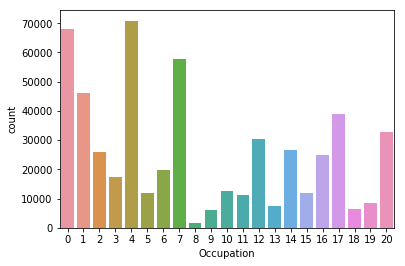

In [63]:
sns.countplot(data.Occupation)